In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')

from sklearn import linear_model

import pickle
%matplotlib inline

In [2]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
df=pd.read_csv(r"https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")

In [5]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [6]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.59665,865.4,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
907,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.shape

(908, 25)

# We have 908 rows and 25 columns in dataset

In [9]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

# We have mixture of  float and object type value in all independent variables.

In [10]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

<AxesSubplot:>

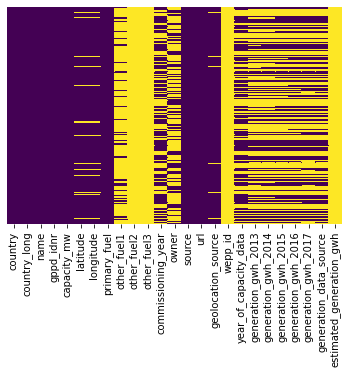

In [11]:
sn.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# there are missing values present in the dataset.

In [19]:
#filling the missing values

df = df.fillna(0.0)

<AxesSubplot:>

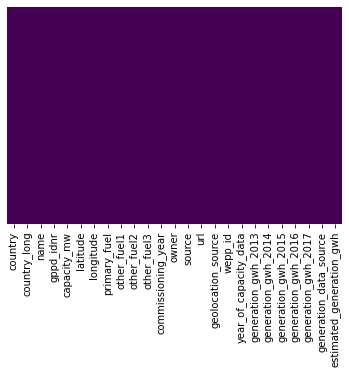

In [20]:
sn.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [21]:
df.nunique()

country                       1
country_long                  1
name                        908
gppd_idnr                   908
capacity_mw                 365
latitude                    838
longitude                   829
primary_fuel                  8
other_fuel1                   4
other_fuel2                   2
other_fuel3                   1
commissioning_year           74
owner                       281
source                      191
url                         304
geolocation_source            4
wepp_id                       1
year_of_capacity_data         2
generation_gwh_2013         364
generation_gwh_2014         374
generation_gwh_2015         398
generation_gwh_2016         405
generation_gwh_2017         410
generation_data_source        2
estimated_generation_gwh      1
dtype: int64

In [23]:
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

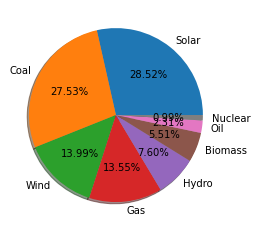

In [25]:
labels = 'Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil','Nuclear'

fig, ax = plt.subplots()
ax.pie(df['primary_fuel'].value_counts(),labels=labels, autopct='%1.2f%%', shadow=True)

plt.show()

# Univariate analysis

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

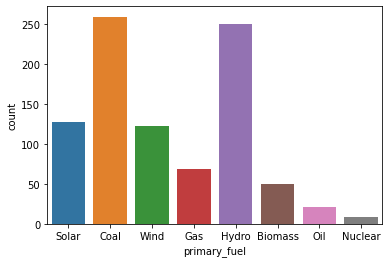

In [27]:
sn.countplot(df['primary_fuel'])

<AxesSubplot:xlabel='country', ylabel='count'>

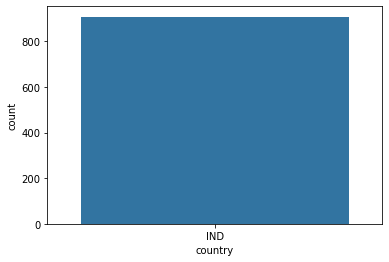

In [29]:
sn.countplot(df['country'])

<AxesSubplot:xlabel='country_long', ylabel='count'>

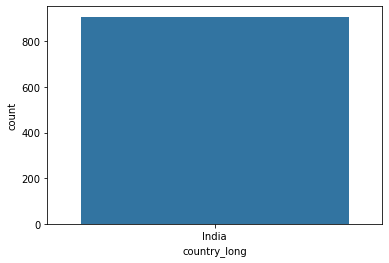

In [30]:
sn.countplot(df['country_long'])

<AxesSubplot:xlabel='name', ylabel='count'>

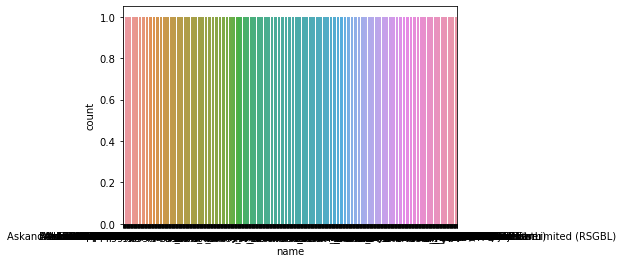

In [31]:
sn.countplot(df['name'])

<AxesSubplot:xlabel='capacity_mw', ylabel='count'>

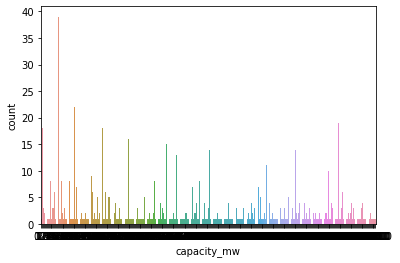

In [33]:
sn.countplot(df['capacity_mw'])

<AxesSubplot:xlabel='year_of_capacity_data', ylabel='count'>

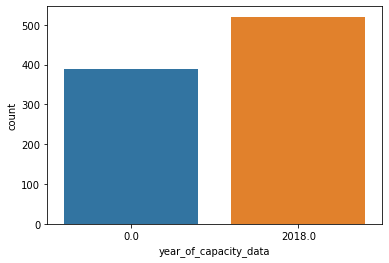

In [34]:
sn.countplot(df['year_of_capacity_data'])

<AxesSubplot:xlabel='wepp_id', ylabel='count'>

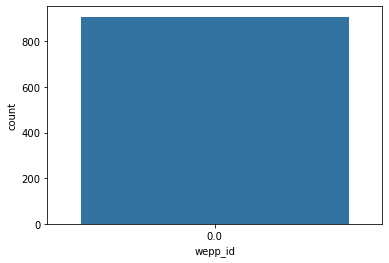

In [35]:
sn.countplot(df['wepp_id'])

# Bivaraite analysis

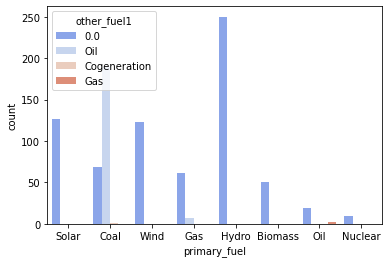

In [40]:
plt.figure(figsize=(6,4))
sn.countplot(df['primary_fuel'], hue='other_fuel1',  data=df, palette='coolwarm');
plt.show()

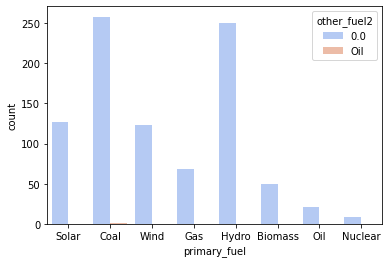

In [41]:
plt.figure(figsize=(6,4))
sn.countplot(df['primary_fuel'], hue='other_fuel2',  data=df, palette='coolwarm');
plt.show()

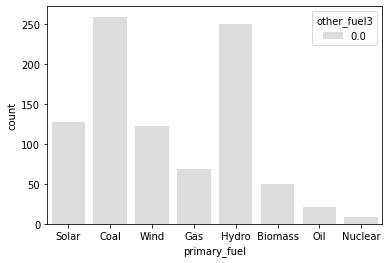

In [47]:
plt.figure(figsize=(6,4))
sn.countplot(df['primary_fuel'], hue='other_fuel3',  data=df, palette='coolwarm');
plt.show()

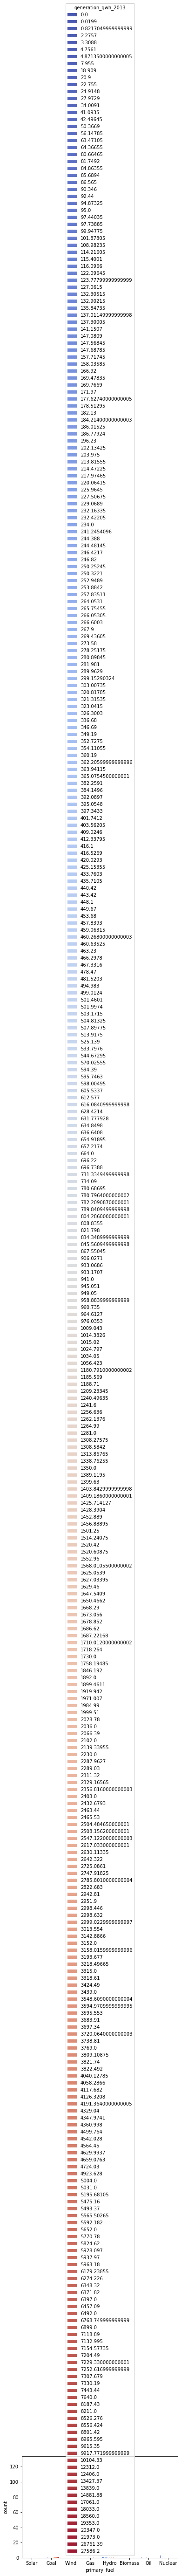

In [42]:
plt.figure(figsize=(6,4))
sn.countplot(df['primary_fuel'], hue='generation_gwh_2013',  data=df, palette='coolwarm');
plt.show()

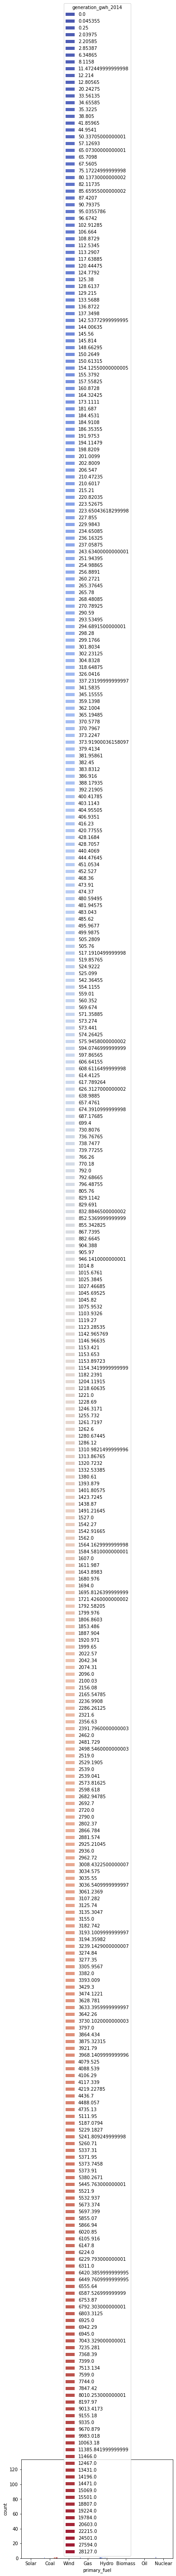

In [43]:
plt.figure(figsize=(6,4))
sn.countplot(df['primary_fuel'], hue='generation_gwh_2014',  data=df, palette='coolwarm');
plt.show()

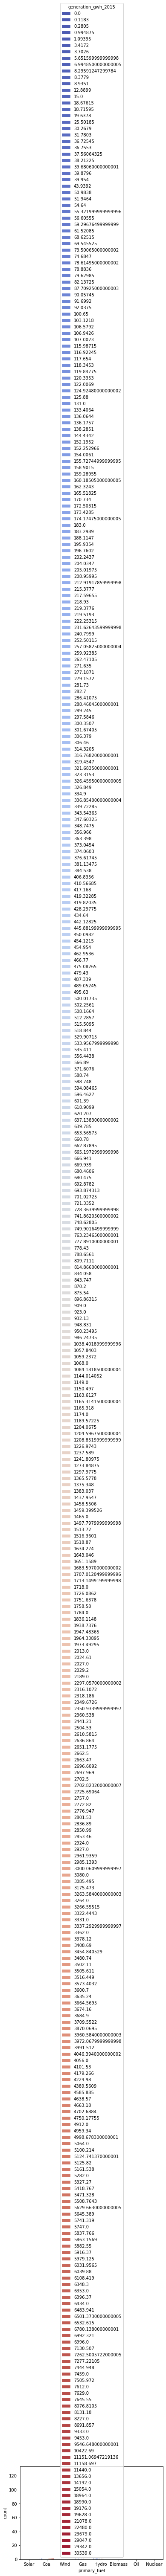

In [44]:
plt.figure(figsize=(6,4))
sn.countplot(df['primary_fuel'], hue='generation_gwh_2015',  data=df, palette='coolwarm');
plt.show()

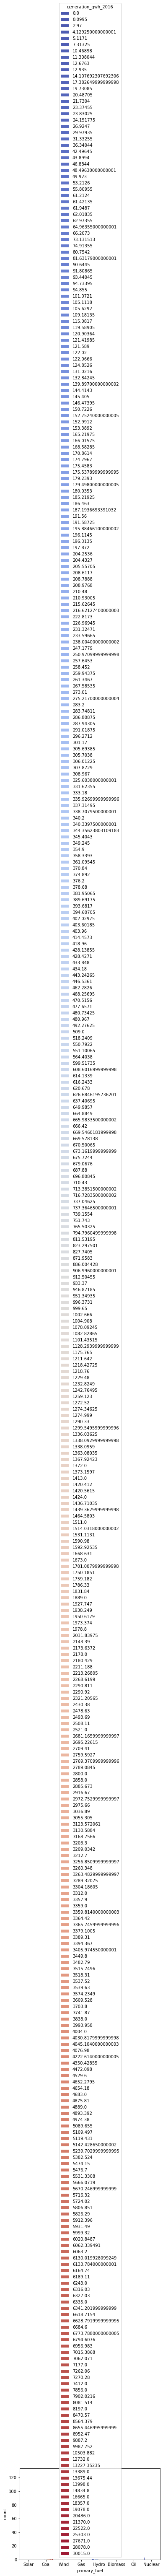

In [45]:
plt.figure(figsize=(6,4))
sn.countplot(df['primary_fuel'], hue='generation_gwh_2016',  data=df, palette='coolwarm');
plt.show()

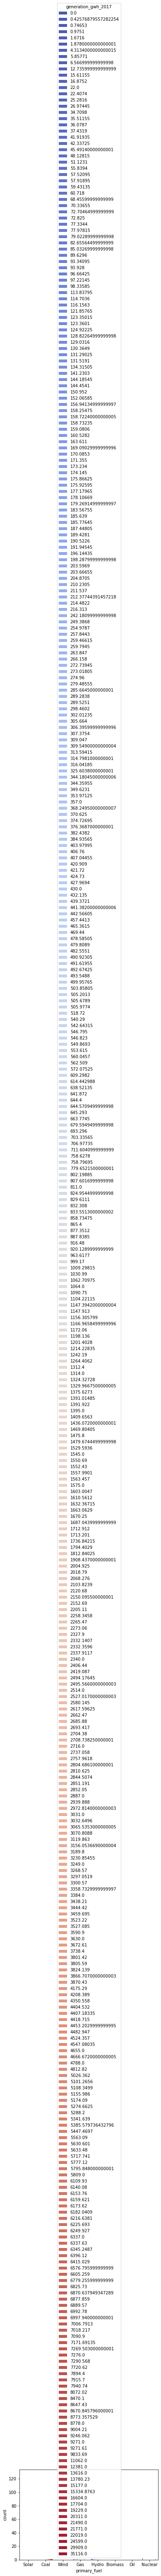

In [46]:
plt.figure(figsize=(6,4))
sn.countplot(df['primary_fuel'], hue='generation_gwh_2017',  data=df, palette='coolwarm');
plt.show()

# Multivariate analysis

<Figure size 576x288 with 0 Axes>

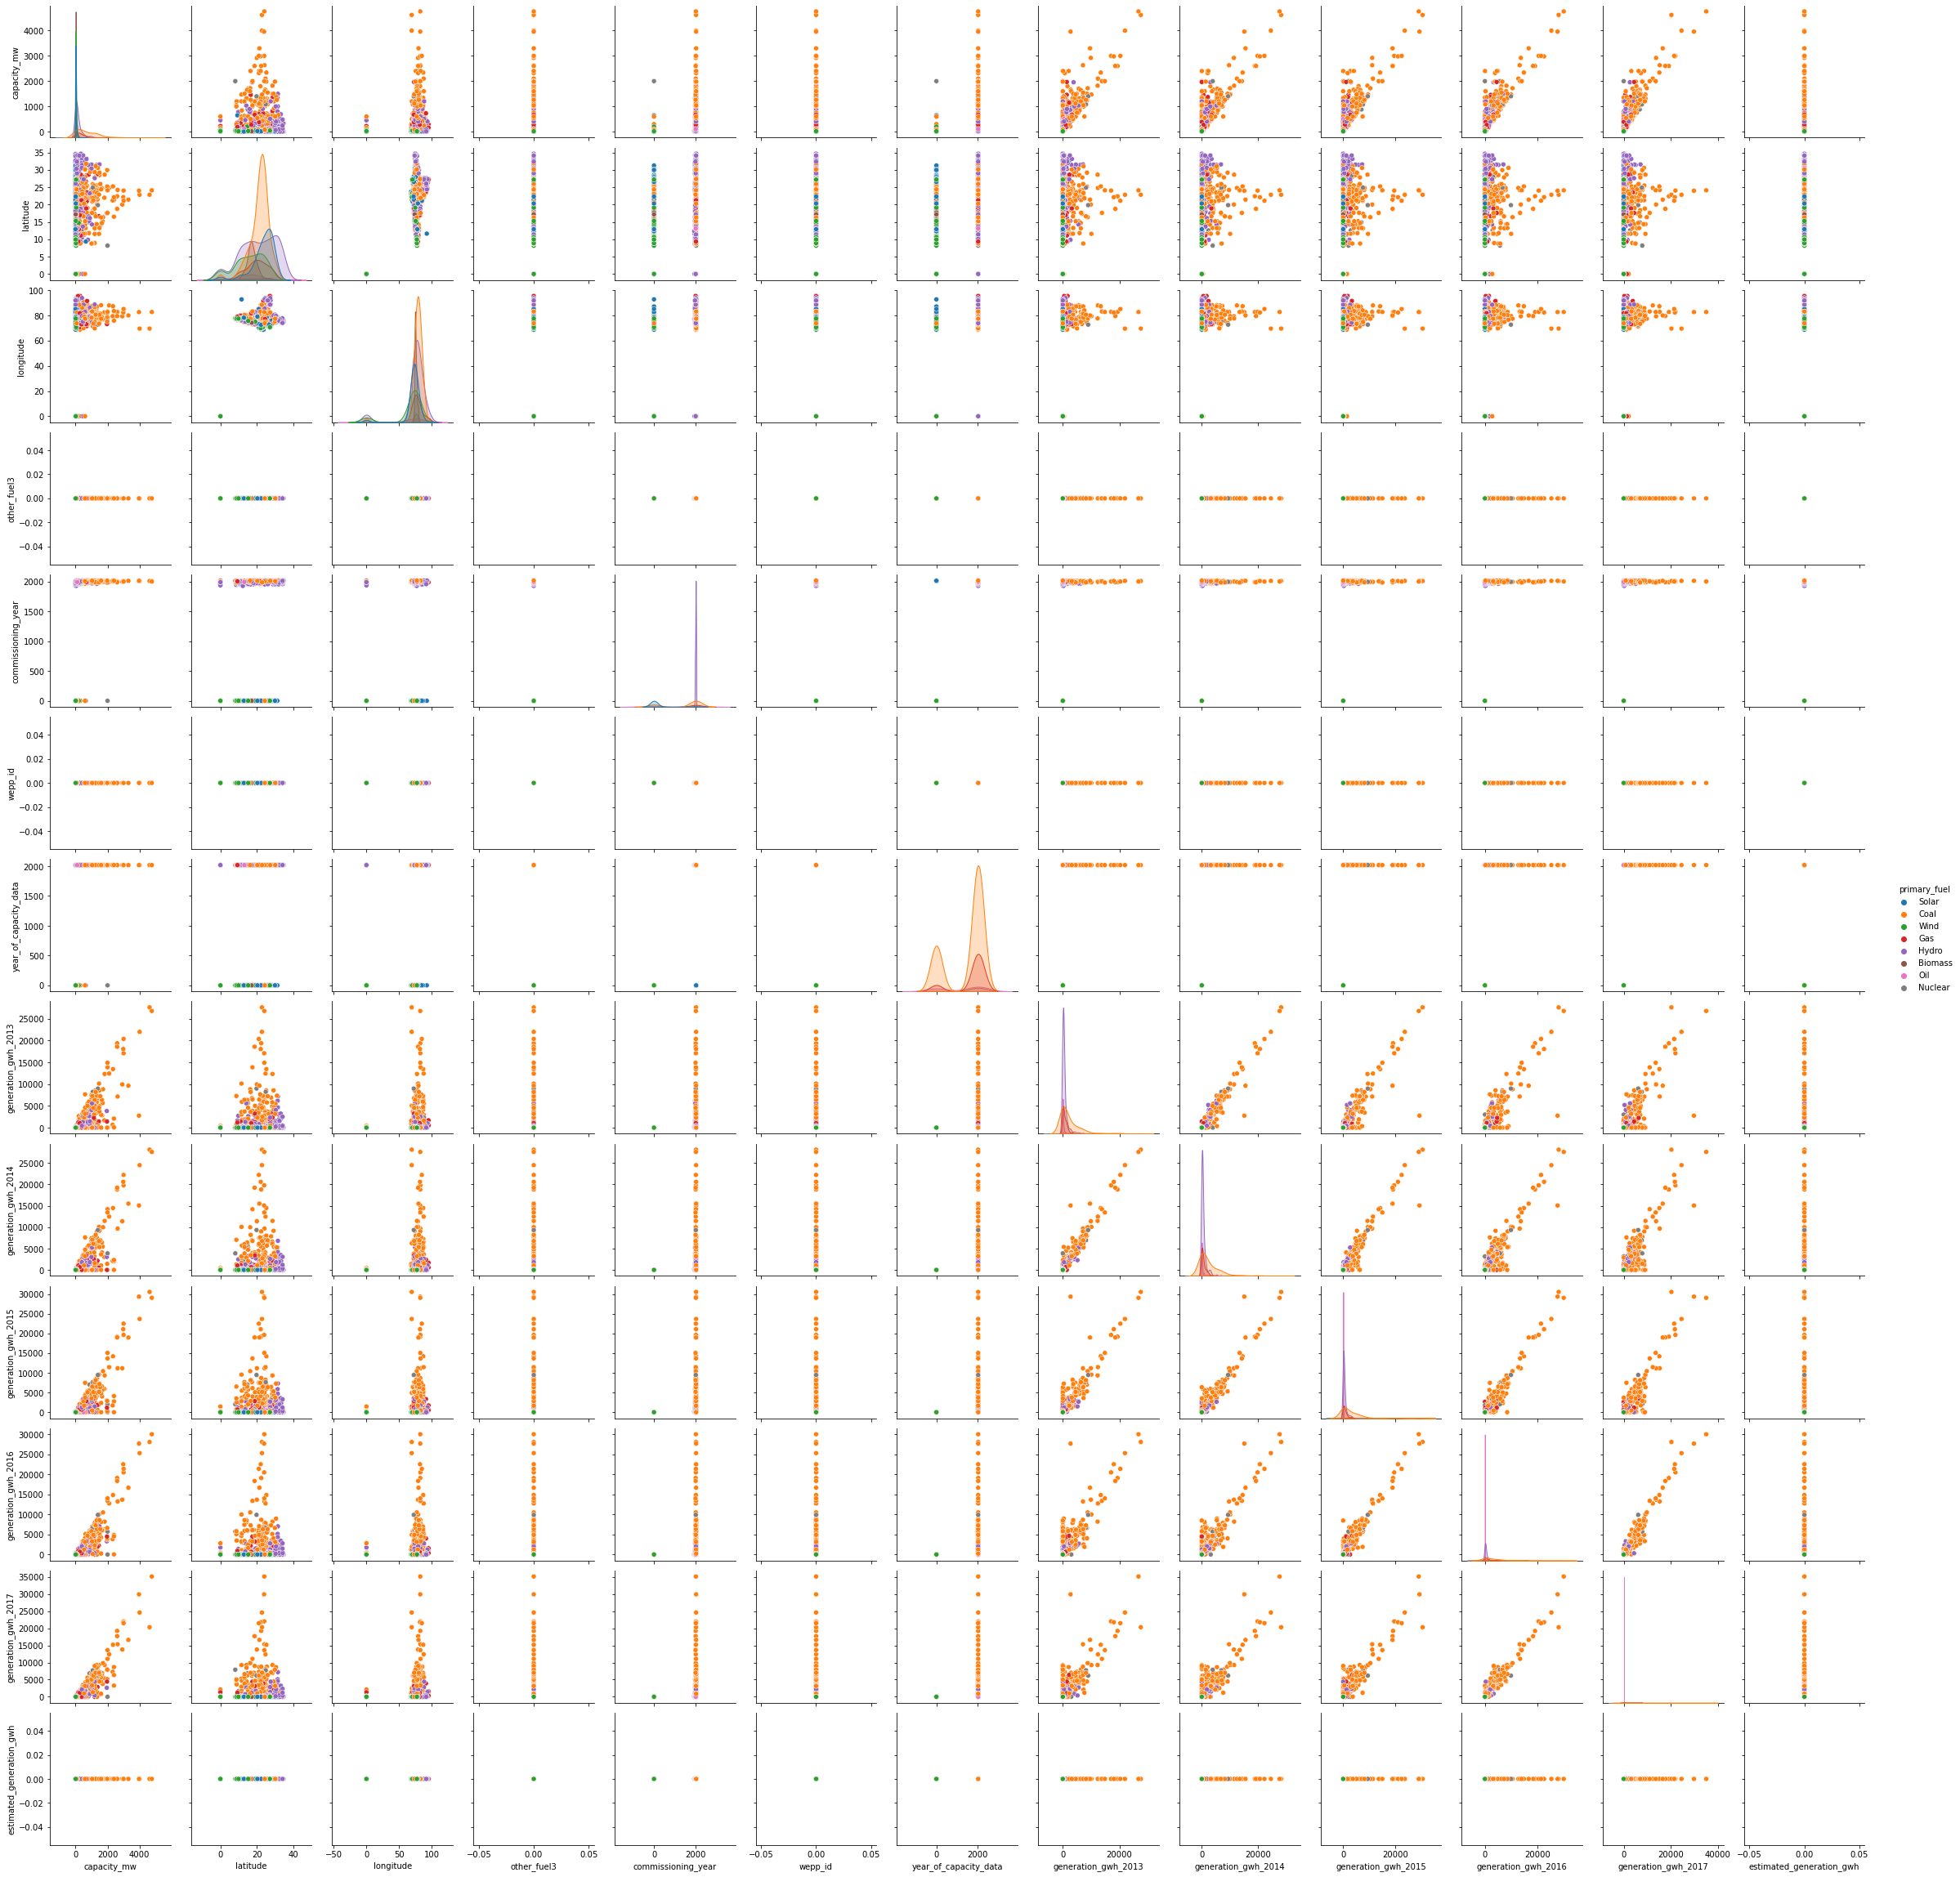

In [38]:
plt.figure(figsize=(8,4))
sn.pairplot(df,hue="primary_fuel")
plt.show()

# Coorelation Matrix

<AxesSubplot:>

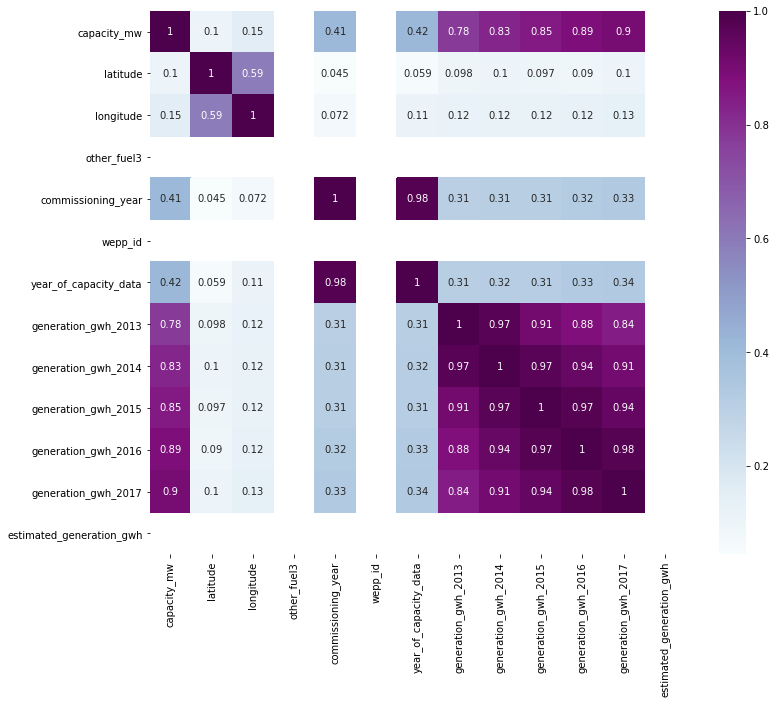

In [49]:
corr = df.corr()
plt.figure(figsize=(12,10))
sn.heatmap(corr, annot = True, cmap="BuPu")

# we are creating a heatmap, to find which other features are having a good relationship with our target variable.

# Outliers

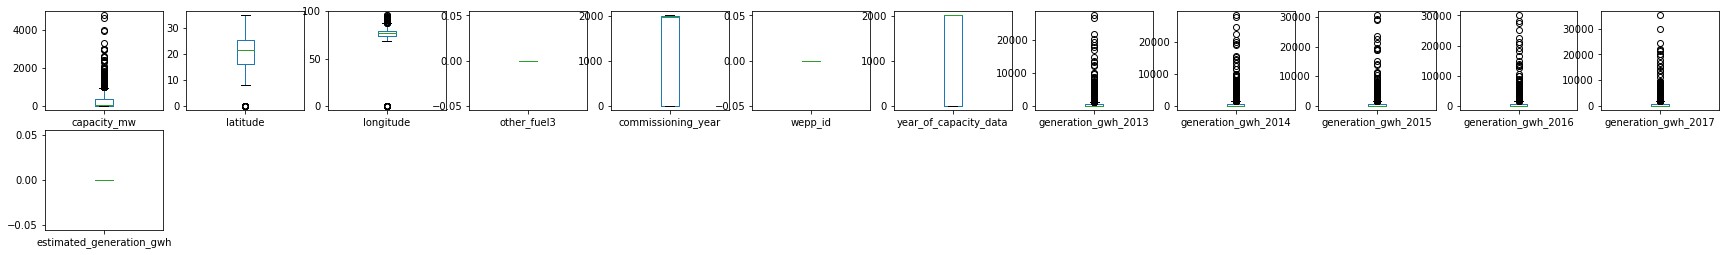

In [56]:
df.plot(kind='box', figsize=(30,26), layout=(12,12), sharex=False, subplots=True);

In [57]:
df.skew()

capacity_mw                 3.193257
latitude                   -0.726161
longitude                  -3.589962
other_fuel3                 0.000000
commissioning_year         -0.330431
wepp_id                     0.000000
year_of_capacity_data      -0.294357
generation_gwh_2013         5.158053
generation_gwh_2014         4.989441
generation_gwh_2015         5.264211
generation_gwh_2016         4.988235
generation_gwh_2017         4.983065
estimated_generation_gwh    0.000000
dtype: float64

In [71]:
df.drop('country',axis=1,inplace=True)

In [ ]:
df

In [72]:
df.head()

,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,India,ACME Solar Tower,WRI1020239,2.50000,28.1839,73.240700,Solar,0,0,0.0,...,National Renewable Energy Laboratory,0.0,0.0,0.000000,0.000000,0.000,0.000000,0.000000,0,0.0
1,India,ADITYA CEMENT WORKS,WRI1019881,98.00000,24.7663,74.609000,Coal,0,0,0.0,...,WRI,0.0,0.0,0.000000,0.000000,0.000,0.000000,0.000000,0,0.0
2,India,AES Saurashtra Windfarms,WRI1026669,39.20000,21.9038,69.373200,Wind,0,0,0.0,...,WRI,0.0,0.0,0.000000,0.000000,0.000,0.000000,0.000000,0,0.0
3,India,AGARTALA GT,IND0000001,135.00000,23.8712,87.309538,Gas,0,0,0.0,...,WRI,0.0,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,0.0
4,India,AKALTARA TPP,IND0000002,945.05625,21.9603,82.409100,Coal,Oil,0,0.0,...,WRI,0.0,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,0.0


# Data preprocessing

In [83]:
# specify input and output attributes
X = df.drop(columns=['primary_fuel'], axis=1)
y = df['primary_fuel']

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Training and Predicting

In [92]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

ValueError: could not convert string to float: 'India'